In [216]:
import networkx as nx
import csv
import matplotlib.pyplot as plot

In [69]:
from bs4 import BeautifulSoup
import urllib2

In [297]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
from scipy import stats

In [162]:
page0 = urllib2.urlopen("https://en.wikipedia.org/wiki/List_of_actors_with_Academy_Award_nominations")
soup0 = BeautifulSoup(page0, 'html.parser')

In [173]:
actors0 = soup0.find_all('tr')[11:][:-11]

In [176]:
actors0[0].find('a').text

u'Barkhad Abdi'

In [178]:
academylist = []
for actor in actors0:
    academylist.append(actor.find('a').text)

In [179]:
academylist

[u'Barkhad Abdi',
 u'F. Murray Abraham',
 u'Amy Adams',
 u'Nick Adams',
 u'Isabelle Adjani',
 u'Casey Affleck',
 u'Shohreh Aghdashloo',
 u'Brian Aherne',
 u'Danny Aiello',
 u'Anouk Aim\xe9e',
 u'Eddie Albert',
 u'Jack Albertson',
 u'Alan Alda',
 u'Norma Aleandro',
 u'Jane Alexander',
 u'Mahershala Ali',
 u'Joan Allen',
 u'Woody Allen',
 u'Sara Allgood',
 u'Don Ameche',
 u'Judith Anderson',
 u'Julie Andrews',
 u'Ann-Margret',
 u'Yalitza Aparicio',
 u'Anne Archer',
 u'Eve Arden',
 u'Alan Arkin',
 u'George Arliss',
 u'Patricia Arquette',
 u'Jean Arthur',
 u'Peggy Ashcroft',
 u'Fred Astaire',
 u'Mary Astor',
 u'Mischa Auer',
 u'Margaret Avery',
 u'Dan Aykroyd',
 u'Lew Ayres',
 u'Lauren Bacall',
 u'Hermione Baddeley',
 u'Mary Badham',
 u'Fay Bainter',
 u'Carroll Baker',
 u'Alec Baldwin',
 u'Christian Bale',
 u'Martin Balsam',
 u'Anne Bancroft',
 u'George Bancroft',
 u'Ian Bannen',
 u'Javier Bardem',
 u'Marie-Christine Barrault',
 u'Adriana Barraza',
 u'Barbara Barrie',
 u'Ethel Barrymore',


In [163]:
page1 = urllib2.urlopen("https://www.boxofficemojo.com/people/?view=Actor&p=.htm")
soup1 = BeautifulSoup(page1, 'html.parser')

In [94]:
actors1 = soup1.find_all('tr')[2].find_all('tr')[1:]

In [95]:
actors1

[<tr bgcolor="#ffffff"><td><font size="2"><b><a href="./chart/?view=Actor&amp;id=amyadams.htm"><b>Amy Adams</b></a></b></font></td>\n<td align="right"><font size="2">$2,401.3</font></td>\n<td align="right"><font size="2">30</font></td>\n<td align="right"><font size="2">$80.0</font></td>\n<td align="center"><font size="2"><a href="/movies/?id=superman2015.htm">Batman v Superman</a></font></td>\n<td align="right"><font size="2">$330.4</font></td>\n</tr>,
 <tr bgcolor="#f4f4ff"><td><font size="2"><b><a href="./chart/?view=Actor&amp;id=benaffleck.htm"><b>Ben Affleck</b></a></b></font></td>\n<td align="right"><font size="2">$2,517.8</font></td>\n<td align="right"><font size="2">39</font></td>\n<td align="right"><font size="2">$64.6</font></td>\n<td align="center"><font size="2"><a href="/movies/?id=superman2015.htm">Batman v Superman</a></font></td>\n<td align="right"><font size="2">$330.4</font></td>\n</tr>,
 <tr bgcolor="#ffffff"><td><font size="2"><b><a href="./chart/?view=Actor&amp;id=c

In [149]:
boxofficedict = {}

In [150]:
def addtodict(actors):
    for actor in actors:
        name = actor.find('b').find('b').text
        boxoffice = str(actor.find('td', attrs={'align':'right'}).text[1:]).replace(",", "")
        if "k" in boxoffice:
            boxoffice = float(boxoffice.replace("k", ""))/1000
        boxofficedict[name] = float(boxoffice)

In [151]:
boxofficedict

{}

In [152]:
page2 = urllib2.urlopen("https://www.boxofficemojo.com/people/?view=Actor&pagenum=2&sort=person&order=ASC&p=.htm")
soup2 = BeautifulSoup(page2, 'html.parser')
actors2 = soup2.find_all('tr')[2].find_all('tr')[1:]

In [153]:
page3 = urllib2.urlopen("https://www.boxofficemojo.com/people/?view=Actor&pagenum=3&sort=person&order=ASC&p=.htm")
soup3 = BeautifulSoup(page3, 'html.parser')
actors3 = soup3.find_all('tr')[2].find_all('tr')[1:]

In [154]:
addtodict(actors1)
addtodict(actors2)
addtodict(actors3)

In [155]:
len(boxofficedict)

868

In [159]:
boxofficedict

{u'Aaron Eckhart': 1450.5,
 u'Aaron Johnson': 874.3,
 u'Abbie Cornish': 339.5,
 u'Abigail Breslin': 1103.9,
 u'Adam Brody': 360.3,
 u'Adam DeVine': 359.4,
 u'Adam Driver': 1692.2,
 u'Adam Horowitz': 0.0419,
 u'Adam Sandler': 2828.5,
 u'Adam Scott': 600.0,
 u'Adrianne Palicki': 210.4,
 u'Adrien Brody': 603.3,
 u'Aimee Teegarden': 10.2,
 u'Akiva Schaffer': 9.6,
 u'Al Pacino': 1457.3,
 u'Alan Alda': 753.0,
 u'Alan Rickman': 1784.2,
 u'Alan Tudyk': 2499.5,
 u'Albert Brooks': 1208.3,
 u'Alec Baldwin': 2706.8,
 u'Alex Kendrick': 78.2,
 u'Alex Pettyfer': 259.4,
 u'Alex Ross Perry': 0.0282,
 u'Alex Russell': 180.2,
 u'Alexa Davalos': 278.7,
 u'Alexa Vega': 369.5,
 u'Alexander Skarsg\xe5rd': 191.4,
 u'Alfred Molina': 1173.7,
 u'Ali Larter': 552.7,
 u'Alice Eve': 571.5,
 u'Alicia Silverstone': 445.6,
 u'Alicia Vikander': 368.0,
 u'Allison Janney': 1278.1,
 u'Alyson Michalka': 100.9,
 u'Amanda Bynes': 435.6,
 u'Amanda Crew': 177.8,
 u'Amanda Peet': 882.0,
 u'Amanda Seyfried': 1088.2,
 u'Amber Hea

In [33]:
with open('title.basics.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    i = 0
    for row in reader:
        if i < 200:
            print(row)
            i = i + 1
        else:
            break

['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']
['tt0000001', 'short', 'Carmencita', 'Carmencita', '0', '1894', '\\N', '1', 'Documentary,Short']
['tt0000002', 'short', 'Le clown et ses chiens', 'Le clown et ses chiens', '0', '1892', '\\N', '5', 'Animation,Short']
['tt0000003', 'short', 'Pauvre Pierrot', 'Pauvre Pierrot', '0', '1892', '\\N', '4', 'Animation,Comedy,Romance']
['tt0000004', 'short', 'Un bon bock', 'Un bon bock', '0', '1892', '\\N', '\\N', 'Animation,Short']
['tt0000005', 'short', 'Blacksmith Scene', 'Blacksmith Scene', '0', '1893', '\\N', '1', 'Comedy,Short']
['tt0000006', 'short', 'Chinese Opium Den', 'Chinese Opium Den', '0', '1894', '\\N', '1', 'Short']
['tt0000007', 'short', 'Corbett and Courtney Before the Kinetograph', 'Corbett and Courtney Before the Kinetograph', '0', '1894', '\\N', '1', 'Short,Sport']
['tt0000008', 'short', 'Edison Kinetoscopic Record of a Sneeze', 'Edison Kinetoscopic Record 

In [48]:
dict = {}
with open('name.basics.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    i = 0
    for row in reader:
        if i < 200:
            print(row)
            i = i + 1
        if i > 1:
            dict[row[0]] = row[1]

['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles']
['nm0000001', 'Fred Astaire', '1899', '1987', 'soundtrack,actor,miscellaneous', 'tt0072308,tt0053137,tt0050419,tt0043044']
['nm0000002', 'Lauren Bacall', '1924', '2014', 'actress,soundtrack', 'tt0117057,tt0037382,tt0038355,tt0071877']
['nm0000003', 'Brigitte Bardot', '1934', '\\N', 'actress,soundtrack,producer', 'tt0057345,tt0054452,tt0049189,tt0059956']
['nm0000004', 'John Belushi', '1949', '1982', 'actor,writer,soundtrack', 'tt0072562,tt0080455,tt0078723,tt0077975']
['nm0000005', 'Ingmar Bergman', '1918', '2007', 'writer,director,actor', 'tt0069467,tt0083922,tt0050976,tt0050986']
['nm0000006', 'Ingrid Bergman', '1915', '1982', 'actress,soundtrack,producer', 'tt0036855,tt0038109,tt0038787,tt0071877']
['nm0000007', 'Humphrey Bogart', '1899', '1957', 'actor,soundtrack,producer', 'tt0034583,tt0033870,tt0043265,tt0037382']
['nm0000008', 'Marlon Brando', '1924', '2004', 'actor,soundtrack,director', '

In [346]:
G = nx.Graph()
Gw = nx.Graph()
Gm = nx.Graph()
moviecountdict = {}

with open('title.principals.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    prev = ""
    actors = []
    for row in reader:
        if row[3] == 'actor' and row[2] in dict and dict[row[2]] in boxofficedict:
            Gm.add_node(dict[row[2]])
            G.add_node(dict[row[2]])
            if dict[row[2]] in moviecountdict:
                moviecountdict[dict[row[2]]] += 1
            else:
                moviecountdict[dict[row[2]]] = 1
        elif row[3] == 'actress' and row[2] in dict and dict[row[2]] in boxofficedict:
            Gw.add_node(dict[row[2]])
            G.add_node(dict[row[2]])
            if dict[row[2]] in moviecountdict:
                moviecountdict[dict[row[2]]] += 1
            else:
                moviecountdict[dict[row[2]]] = 1
        else:
            continue
        if row[0] != prev:
            for a1 in actors:
                for a2 in actors:
                    if a1 == a2:
                        continue
                    G.add_edge(a1, a2)
                    if a1 in Gw.nodes and a2 in Gw.nodes:
                        Gw.add_edge(a1, a2)
                    elif a1 in Gm.nodes and a2 in Gm.nodes:
                        Gm.add_edge(a1, a2)
            actors = [dict[row[2]]]
        else:
            actors.append(dict[row[2]])
        prev = row[0]

In [347]:
moviecountdict

{'Aaron Eckhart': 35,
 'Aaron Johnson': 14,
 'Abbie Cornish': 84,
 'Abigail Breslin': 30,
 'Adam Brody': 139,
 'Adam Driver': 37,
 'Adam Horowitz': 2,
 'Adam Sandler': 55,
 'Adam Scott': 92,
 'Adrianne Palicki': 54,
 'Adrien Brody': 56,
 'Aimee Teegarden': 59,
 'Akiva Schaffer': 14,
 'Al Pacino': 67,
 'Alan Alda': 328,
 'Alan Rickman': 43,
 'Alan Tudyk': 98,
 'Albert Brooks': 28,
 'Alec Baldwin': 264,
 'Alex Kendrick': 5,
 'Alex Pettyfer': 24,
 'Alex Ross Perry': 5,
 'Alex Russell': 61,
 'Alexa Davalos': 57,
 'Alexa Vega': 2,
 'Alfred Molina': 257,
 'Ali Larter': 65,
 'Alice Eve': 31,
 'Alicia Silverstone': 132,
 'Alicia Vikander': 49,
 'Allison Janney': 336,
 'Amanda Bynes': 180,
 'Amanda Crew': 81,
 'Amanda Peet': 122,
 'Amanda Seyfried': 33,
 'Amber Heard': 40,
 'America Ferrera': 308,
 'Amy Adams': 54,
 'Amy Ryan': 51,
 'Amy Schumer': 51,
 'Analeigh Tipton': 30,
 'Andrew Garfield': 25,
 'Andy Samberg': 192,
 'Andy Serkis': 78,
 'Angela Bassett': 97,
 'Angelina Jolie': 53,
 'Anna Fa

In [195]:
list(G.nodes)

['Leonard Nimoy',
 'Josh Hartnett',
 'Shailene Woodley',
 'Helena Bonham Carter',
 'Ron Livingston',
 'Greta Gerwig',
 'Jorma Taccone',
 'Anna Kendrick',
 'William Hurt',
 'Alfred Molina',
 'John Krasinski',
 'Liev Schreiber',
 'Alan Tudyk',
 'Mark Strong',
 'Hugo Weaving',
 'Nick Swardson',
 'Jay Chandrasekhar',
 'Jena Malone',
 'Carlos Mencia',
 'Joan Allen',
 'Patrick Wilson',
 'Kumail Nanjiani',
 'Gena Rowlands',
 'Amanda Bynes',
 'Tommy Lee Jones',
 'Peter Berg',
 'Alicia Silverstone',
 'Brendan Fraser',
 'Benedict Cumberbatch',
 'Werner Herzog',
 'Susan Sarandon',
 'Philip Seymour Hoffman',
 'Forest Whitaker',
 'Analeigh Tipton',
 'Channing Tatum',
 'Omar Epps',
 'Aimee Teegarden',
 'Tilda Swinton',
 'Holly Hunter',
 'Amy Ryan',
 'Rebecca Romijn',
 'Jai Courtney',
 'Anthony Mackie',
 'Uma Thurman',
 'Sam Worthington',
 'Natalie Portman',
 'Brandon Routh',
 'Kellan Lutz',
 'Chadwick Boseman',
 'Toni Collette',
 'Mindy Kaling',
 'Denise Richards',
 'Kevin Smith',
 'Ben Whishaw',
 '

In [196]:
len(G.nodes)

834

In [197]:
list(G.edges)

[('Leonard Nimoy', 'Chris Pine'),
 ('Leonard Nimoy', 'Jeff Goldblum'),
 ('Leonard Nimoy', 'Simon Pegg'),
 ('Leonard Nimoy', 'Abigail Breslin'),
 ('Leonard Nimoy', 'Jonathan Pryce'),
 ('Leonard Nimoy', 'Sandra Bullock'),
 ('Leonard Nimoy', 'Robert Redford'),
 ('Leonard Nimoy', 'Michael Douglas'),
 ('Josh Hartnett', 'Michelle Williams'),
 ('Josh Hartnett', 'Ewan McGregor'),
 ('Josh Hartnett', 'Kate Beckinsale'),
 ('Josh Hartnett', 'Ben Affleck'),
 ('Josh Hartnett', 'Ben Kingsley'),
 ('Josh Hartnett', 'Samuel L. Jackson'),
 ('Josh Hartnett', 'Mira Sorvino'),
 ('Josh Hartnett', 'Johnny Knoxville'),
 ('Josh Hartnett', 'Naomie Harris'),
 ('Josh Hartnett', 'Julia Stiles'),
 ('Josh Hartnett', 'Jamie Lee Curtis'),
 ('Josh Hartnett', 'Hilary Swank'),
 ('Josh Hartnett', 'Woody Harrelson'),
 ('Josh Hartnett', 'Adam Scott'),
 ('Josh Hartnett', 'Rory Kinnear'),
 ('Josh Hartnett', 'Josh Hutcherson'),
 ('Josh Hartnett', 'Scarlett Johansson'),
 ('Josh Hartnett', 'Matthew Lillard'),
 ('Josh Hartnett', '

In [198]:
len(G.edges)

11652

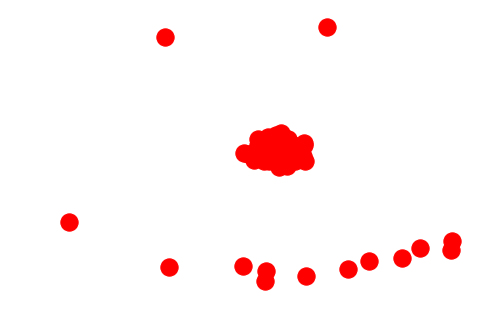

In [199]:
nx.draw(G, with_labels=False, font_weight='bold')

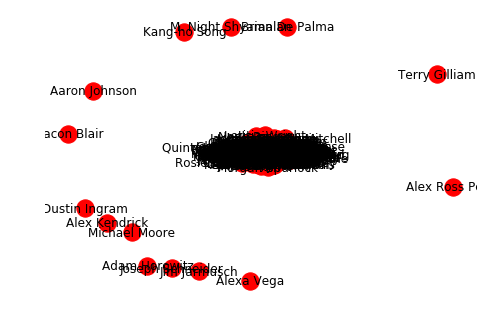

In [202]:
nx.draw(G, with_labels=True)

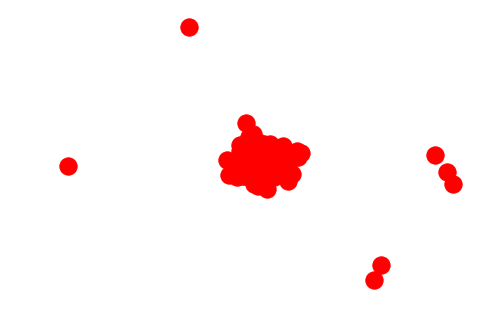

In [240]:
nx.draw(Gw)

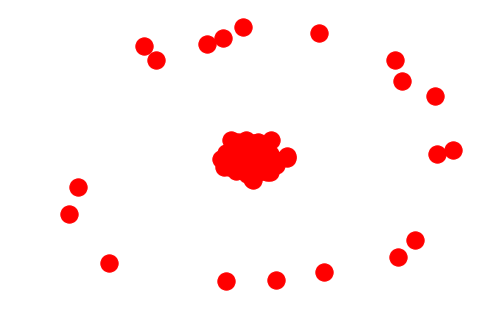

In [241]:
nx.draw(Gm)

In [244]:
actorw = sorted(Gw.nodes)
actorm = sorted(Gm.nodes)

In [203]:
degree_centrality = nx.degree_centrality(G)

In [204]:
sorted(degree_centrality, key=degree_centrality.get, reverse=True)

['Samuel L. Jackson',
 'Susan Sarandon',
 'Bruce Willis',
 'Morgan Freeman',
 'Nicole Kidman',
 'Anthony Hopkins',
 'Julianne Moore',
 'Michael Caine',
 'Liam Neeson',
 'Nicolas Cage',
 'Meryl Streep',
 'Alfred Molina',
 'Ed Harris',
 'Ewan McGregor',
 'Gary Oldman',
 'Alec Baldwin',
 'Dennis Quaid',
 'James Franco',
 'Ben Kingsley',
 'Matt Damon',
 'Colin Farrell',
 'Mark Wahlberg',
 'Willem Dafoe',
 'Woody Harrelson',
 'John Malkovich',
 'Cate Blanchett',
 'Julia Roberts',
 'Johnny Depp',
 'Kate Winslet',
 'Ben Affleck',
 'Matthew McConaughey',
 'Forest Whitaker',
 'Tom Hanks',
 'John Goodman',
 'Toni Collette',
 'Will Ferrell',
 'Seth Green',
 'John Cusack',
 'Glenn Close',
 'Ralph Fiennes',
 'Helen Mirren',
 'Owen Wilson',
 'Jennifer Aniston',
 'Michelle Pfeiffer',
 'Billy Bob Thornton',
 'Angelina Jolie',
 'Naomi Watts',
 'John Leguizamo',
 'Rosario Dawson',
 'Pierce Brosnan',
 'Christopher Walken',
 'Christopher Plummer',
 'Kevin Spacey',
 'Jessica Alba',
 'Christian Bale',
 'Vin

In [205]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [206]:
sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

['Morgan Freeman',
 'Susan Sarandon',
 'Anthony Hopkins',
 'Samuel L. Jackson',
 'Bruce Willis',
 'Nicole Kidman',
 'Julianne Moore',
 'Ed Harris',
 'Michael Caine',
 'Meryl Streep',
 'Colin Farrell',
 'Alec Baldwin',
 'Nicolas Cage',
 'Matt Damon',
 'Mark Wahlberg',
 'Cate Blanchett',
 'John Malkovich',
 'Liam Neeson',
 'Willem Dafoe',
 'Gary Oldman',
 'Julia Roberts',
 'Ewan McGregor',
 'Matthew McConaughey',
 'Kate Winslet',
 'Woody Harrelson',
 'Christian Bale',
 'Angelina Jolie',
 'Jude Law',
 'Ralph Fiennes',
 'John Goodman',
 'Christopher Plummer',
 'John Cusack',
 'Dennis Quaid',
 'Ben Kingsley',
 'Ben Affleck',
 'Tom Hanks',
 'Michelle Pfeiffer',
 'Christopher Walken',
 'Glenn Close',
 'Helen Mirren',
 'Alfred Molina',
 'Billy Bob Thornton',
 'Johnny Depp',
 'George Clooney',
 'Vince Vaughn',
 'Kevin Spacey',
 'Brad Pitt',
 'Tommy Lee Jones',
 'Robert Duvall',
 'Charlize Theron',
 'Russell Crowe',
 'Diane Lane',
 'Kevin Bacon',
 'Forest Whitaker',
 'Kathy Bates',
 'Colin Firth

In [207]:
closeness_centrality = nx.closeness_centrality(G)

In [208]:
sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

['Samuel L. Jackson',
 'Bruce Willis',
 'Susan Sarandon',
 'Nicole Kidman',
 'Morgan Freeman',
 'Julianne Moore',
 'Liam Neeson',
 'Anthony Hopkins',
 'Nicolas Cage',
 'Alfred Molina',
 'Ed Harris',
 'Alec Baldwin',
 'Michael Caine',
 'Willem Dafoe',
 'Gary Oldman',
 'Colin Farrell',
 'James Franco',
 'Woody Harrelson',
 'Meryl Streep',
 'John Goodman',
 'Ewan McGregor',
 'Matthew McConaughey',
 'Dennis Quaid',
 'Julia Roberts',
 'Ben Kingsley',
 'Mark Wahlberg',
 'John Malkovich',
 'Jessica Alba',
 'Matt Damon',
 'Rosario Dawson',
 'Cate Blanchett',
 'Forest Whitaker',
 'Pierce Brosnan',
 'Ralph Fiennes',
 'John Cusack',
 'Billy Bob Thornton',
 'Angelina Jolie',
 'Glenn Close',
 'Ben Affleck',
 'Jack Black',
 'Kate Winslet',
 'Christopher Walken',
 'Vince Vaughn',
 'Sigourney Weaver',
 'Toni Collette',
 'Paul Giamatti',
 'Greg Kinnear',
 'Tom Hanks',
 'Jennifer Aniston',
 'Elizabeth Banks',
 'Tom Wilkinson',
 'Kirsten Dunst',
 'Johnny Depp',
 'Will Ferrell',
 'John Leguizamo',
 'Tommy

In [209]:
betweenness_centrality = nx.betweenness_centrality(G)

In [210]:
sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

['Samuel L. Jackson',
 'Dennis Quaid',
 'Seth Green',
 'Alfred Molina',
 'Bruce Willis',
 'Liam Neeson',
 'Susan Sarandon',
 'Michael Caine',
 'Nicole Kidman',
 'James Franco',
 'Ben Kingsley',
 'Rosario Dawson',
 'Forest Whitaker',
 'Nicolas Cage',
 'Anthony Hopkins',
 'Julianne Moore',
 'Will Ferrell',
 'Seth Rogen',
 'Morgan Freeman',
 'Woody Harrelson',
 'Ewan McGregor',
 'Tom Hanks',
 'Gary Oldman',
 'Toni Collette',
 'Ron Perlman',
 'Elizabeth Banks',
 'Alec Baldwin',
 'Naomi Watts',
 'Willem Dafoe',
 'Harrison Ford',
 'Salma Hayek',
 'Mark Hamill',
 'Virginia Madsen',
 'Johnny Depp',
 'Jennifer Aniston',
 'Julia Roberts',
 'Meryl Streep',
 'Cameron Diaz',
 'Brian Cox',
 'Helen Mirren',
 'Bryan Cranston',
 'Ed Harris',
 'Tom Wilkinson',
 'John Leguizamo',
 'Josh Brolin',
 'Cate Blanchett',
 'Jamie Foxx',
 'John Malkovich',
 'Greg Kinnear',
 'Pierce Brosnan',
 'Ben Affleck',
 'Sigourney Weaver',
 'James Marsden',
 'Adam Sandler',
 'Colin Farrell',
 'Matthew McConaughey',
 'Kevin S

In [252]:
degree_centralities = []
actorlist = [a for a in actorw]
for a in actorm:
    actorlist.append(a)
for actor in actorlist:
    degree_centralities.append(degree_centrality.get(actor))

In [253]:
len(actorw)

313

In [254]:
actorlist

['Abbie Cornish',
 'Abigail Breslin',
 'Adrianne Palicki',
 'Aimee Teegarden',
 'Alexa Davalos',
 'Alexa Vega',
 'Ali Larter',
 'Alice Eve',
 'Alicia Silverstone',
 'Alicia Vikander',
 'Allison Janney',
 'Amanda Bynes',
 'Amanda Crew',
 'Amanda Peet',
 'Amanda Seyfried',
 'Amber Heard',
 'America Ferrera',
 'Amy Adams',
 'Amy Ryan',
 'Amy Schumer',
 'Analeigh Tipton',
 'Angela Bassett',
 'Angelina Jolie',
 'Anna Faris',
 'Anna Friel',
 'Anna Kendrick',
 'Anna Paquin',
 'AnnaSophia Robb',
 'Anne Bancroft',
 'Anne Hathaway',
 'Annette Bening',
 'Ashley Bell',
 'Ashley Greene',
 'Ashley Judd',
 'Aubrey Plaza',
 'Barbra Streisand',
 'Bel Powley',
 'Bella Thorne',
 'Bette Midler',
 'Blake Lively',
 'Bonnie Hunt',
 'Bridget Moynahan',
 'Brie Larson',
 'Brit Marling',
 'Brittany Murphy',
 'Brooklyn Decker',
 'Bryce Dallas Howard',
 'Cameron Diaz',
 'Cara Delevingne',
 'Carey Mulligan',
 'Carla Gugino',
 'Carrie Fisher',
 'Carrie Underwood',
 'Carrie-Anne Moss',
 'Cate Blanchett',
 'Catherine 

In [255]:
degree_centralities

[0.03361344537815126,
 0.04441776710684273,
 0.014405762304921969,
 0.013205282112845136,
 0.010804321728691476,
 0.0,
 0.010804321728691476,
 0.030012004801920768,
 0.024009603841536612,
 0.031212484993997598,
 0.05522208883553421,
 0.008403361344537815,
 0.013205282112845136,
 0.04441776710684273,
 0.04561824729891956,
 0.03841536614645858,
 0.024009603841536612,
 0.062424969987995196,
 0.026410564225690273,
 0.02160864345738295,
 0.012004801920768306,
 0.03961584633853541,
 0.07202881152460984,
 0.04201680672268907,
 0.027611044417767103,
 0.049219687875150055,
 0.03361344537815126,
 0.024009603841536612,
 0.028811524609843937,
 0.058823529411764705,
 0.052821128451380546,
 0.0012004801920768306,
 0.015606242496998799,
 0.03721488595438175,
 0.03241296518607443,
 0.004801920768307323,
 0.013205282112845136,
 0.009603841536614645,
 0.025210084033613443,
 0.028811524609843937,
 0.024009603841536612,
 0.027611044417767103,
 0.04441776710684273,
 0.009603841536614645,
 0.036014405762304

In [256]:
boxofficegross = []
for actor in actorlist:
    boxofficegross.append(boxofficedict[actor])

In [257]:
boxofficegross

[339.5,
 1103.9,
 210.4,
 10.2,
 278.7,
 369.5,
 552.7,
 571.5,
 445.6,
 368.0,
 1278.1,
 435.6,
 177.8,
 882.0,
 1088.2,
 851.4,
 574.6,
 2401.3,
 511.7,
 214.4,
 151.8,
 1801.4,
 2179.5,
 1566.8,
 169.4,
 1123.3,
 997.6,
 272.8,
 548.0,
 2568.2,
 614.4,
 56.2,
 1368.8,
 1085.0,
 178.6,
 995.4,
 25.9,
 324.9,
 754.6,
 538.6,
 1741.7,
 696.6,
 509.6,
 17.5,
 706.9,
 209.9,
 2009.3,
 3031.7,
 401.0,
 321.0,
 1419.1,
 2890.6,
 43.9,
 872.5,
 3327.7,
 1229.3,
 1666.4,
 493.7,
 269.4,
 1671.0,
 1117.1,
 743.7,
 307.9,
 552.9,
 100.6,
 154.9,
 579.5,
 21.5,
 1774.9,
 1548.5,
 556.5,
 1025.3,
 365.6,
 1307.8,
 2027.8,
 132.2,
 1614.6,
 135.9,
 3006.5,
 782.3,
 1805.4,
 686.6,
 912.6,
 730.9,
 31.5,
 64.0,
 1468.9,
 238.9,
 52.4,
 468.2,
 1590.6,
 1558.7,
 3207.9,
 354.0,
 203.5,
 574.9,
 873.4,
 995.8,
 1428.6,
 647.0,
 1448.0,
 360.0,
 406.2,
 132.5,
 1992.1,
 517.4,
 358.2,
 180.3,
 340.1,
 657.3,
 1387.9,
 711.2,
 188.2,
 2512.8,
 895.7,
 1988.1,
 338.4,
 1007.1,
 1630.0,
 2966.5,
 402.3,

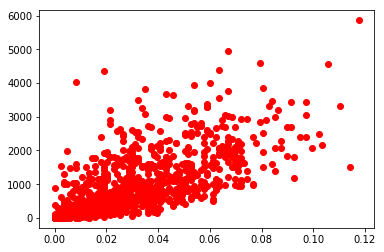

In [258]:
plot.plot(degree_centralities, boxofficegross, "ro")

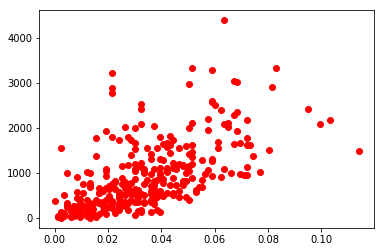

In [260]:
plot.plot(degree_centralities[:313], boxofficegross[:313], "ro")

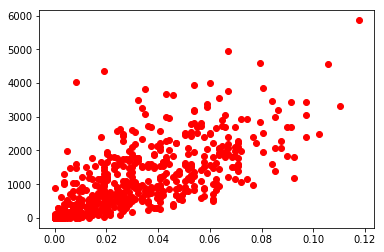

In [261]:
plot.plot(degree_centralities[313:], boxofficegross[313:], "ro")

In [373]:
x = np.array(degree_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err

(26339.183676790337,
 193.83274373385336,
 0.6511147814286344,
 7.914416519515544e-103,
 1058.7091727943603)

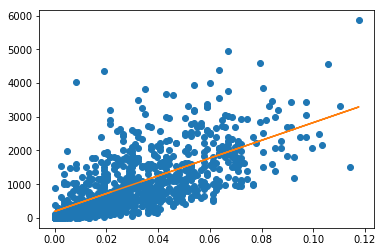

In [374]:
plot.figure()
plot.plot(x, y, "o")
yfit = [intercept + slope * xi for xi in x]
plot.plot(x, yfit)

In [318]:
xw = np.array(degree_centralities[:313])
yw = np.array(boxofficegross[:313])
slope, intercept, r_value, p_value, std_err = stats.linregress(xw,yw)
slope, intercept, r_value, p_value, std_err

(22744.539955279557,
 150.50536193200503,
 0.614319472312018,
 7.333830083788348e-34,
 1656.575674994959)

In [319]:
xm = np.array(degree_centralities[313:])
ym = np.array(boxofficegross[313:])
slope, intercept, r_value, p_value, std_err = stats.linregress(xm,ym)
slope, intercept, r_value, p_value, std_err

(27875.13358067051,
 239.10102089933412,
 0.6749033989433402,
 1.0346194481276879e-71,
 1326.3540781055056)

In [265]:
academynominated = []
for a in actorlist:
    if a in academylist:
        academynominated.append(1)
    else:
        academynominated.append(0)

In [284]:
x_train = np.concatenate((x[0:213], x[313:734]))
x_test = np.concatenate((x[213:313], x[734:]))
y_train = np.concatenate((academynominated[0:213], academynominated[313:734]))
y_test = np.concatenate((academynominated[213:313], academynominated[734:]))

In [268]:
log = LogisticRegression(solver='lbfgs').fit(x, academynominated)

In [269]:
log.score(x, academynominated)

0.7224199288256228

In [300]:
lr = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
lr.score(x_train, y_train)

0.7318611987381703

In [301]:
lr.score(x_test, y_test)

0.69377990430622

In [296]:
nx.write_gexf(G, "graph.gexf")

In [334]:
eigenvector_centralities = []
for actor in actorlist:
    eigenvector_centralities.append(eigenvector_centrality.get(actor))

In [335]:
x_e = np.array(eigenvector_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_e,y)
slope, intercept, r_value, p_value, std_err

(27507.87938085309,
 329.26906142310236,
 0.6415697796285342,
 5.958461190629852e-99,
 1134.0891576313993)

In [336]:
betweenness_centralities = []
for actor in actorlist:
    betweenness_centralities.append(betweenness_centrality.get(actor))
x_b = np.array(betweenness_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_b,y)
slope, intercept, r_value, p_value, std_err 

(269999.55312819115,
 624.7933851735197,
 0.573012276976717,
 9.902056149654109e-75,
 13316.033242402085)

In [337]:
closeness_centralities = []
for actor in actorlist:
    closeness_centralities.append(closeness_centrality.get(actor))
x_c = np.array(closeness_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_c,y)
slope, intercept, r_value, p_value, std_err 

(6597.952986591879,
 -1562.7347245612943,
 0.4830558781701318,
 1.6924207055999503e-50,
 412.39596316513365)

In [341]:
log = LogisticRegression(solver='lbfgs').fit(x_e.reshape(-1,1), academynominated)
log.score(x_e.reshape(-1,1), academynominated)

0.7224199288256228

In [342]:
log = LogisticRegression(solver='lbfgs').fit(x_b.reshape(-1,1), academynominated)
log.score(x_b.reshape(-1,1), academynominated)

0.7224199288256228

In [343]:
log = LogisticRegression(solver='lbfgs').fit(x_c.reshape(-1,1), academynominated)
log.score(x_c.reshape(-1,1), academynominated)

0.7224199288256228

In [348]:
moviecounts = []
for actor in actorlist:
    moviecounts.append(moviecountdict.get(actor))

In [349]:
xc = np.array(moviecounts)
yc = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(xc,yc)
slope, intercept, r_value, p_value, std_err

(0.8865927374000123,
 981.9637104554145,
 0.0969530628541746,
 0.004840771144050305,
 0.31384399440591426)

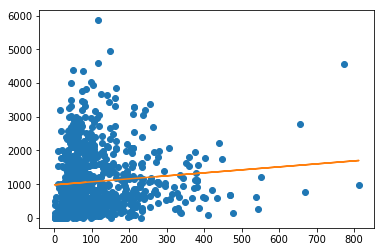

In [371]:
plot.figure()
plot.plot(moviecounts, boxofficegross, "o")
plot.plot(moviecounts, [slope*x + intercept for x in moviecounts])

In [352]:
import statsmodels.api as sm
import pandas as pd

In [357]:
df = pd.DataFrame(
    {
        'degree_centralities': degree_centralities,
        'eigenvector_centralities': eigenvector_centralities,
        'betweenness_centralities': eigenvector_centralities,
        'closeness_centralities': eigenvector_centralities,
        'moviecount': moviecounts,
        'boxofficegross': boxofficegross,
        'academynominated': academynominated
    })

In [375]:
X = df[['degree_centralities', 'moviecount']]

In [376]:
X = sm.add_constant(X) # adding a constant
Y = boxofficegross
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     309.8
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          1.70e-101
Time:                        15:52:28   Log-Likelihood:                -6714.0
No. Observations:                 843   AIC:                         1.343e+04
Df Residuals:                     840   BIC:                         1.345e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 210.7884    